<a href="https://colab.research.google.com/github/amit-lab/deepLearning/blob/master/intro_tf_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

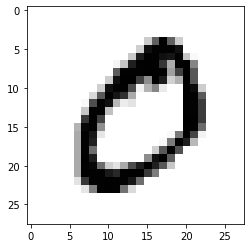

In [18]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [19]:
print(y_train[1])5 0 4 ... 5 6 8]

0


In [0]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

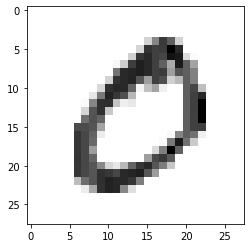

In [22]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [0]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9766


In [29]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9658
0.1094442829489708
0.9657999873161316


In [30]:
model.save('epic_num.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num.model/assets


In [0]:
new_model = tf.keras.models.load_model('epic_num.model')

In [0]:
prediction = new_model.predict(X_test)

In [34]:
print(prediction[0])

[1.7805252e-10 6.9528994e-08 2.9105124e-06 3.0634215e-05 1.9586011e-09
 1.5888911e-09 1.6316615e-15 9.9996328e-01 5.6394294e-09 3.1492330e-06]


In [35]:
import numpy as np
print(np.argmax(prediction[0]))

7


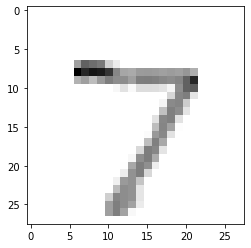

In [37]:
plt.imshow(X_test[0], cmap=plt.cm.binary)